In [1]:
import sympy

In [2]:
%display typeset

In [3]:
var('Q S E I R D a b c d e f lam')

(Q, S, E, I, R, D, a, b, c, d, e, f, lam)

In [4]:
lam = c*I
dQdt=a*S - b*Q
dSdt=-a*S + b*Q - lam*S
dEdt=lam*S - d*E
dIdt=d*E - (e+f)*I
dRdt=f*I
dDdt=e*I

In [5]:
solve([dQdt, dSdt,dEdt,dIdt],[Q,S,E,I])

[[Q == r1, S == b*r1/a, E == 0, I == 0]]

In [6]:
jack=jacobian([dQdt, dSdt,dEdt,dIdt],[Q,S,E,I])
jack

[      -b        a        0        0]
[       b -I*c - a        0     -S*c]
[       0      I*c       -d      S*c]
[       0        0        d   -e - f]

In [7]:
cp = jack.characteristic_polynomial()
cp

x^4 + (I*c + a + b + d + e + f)*x^3 + (I*b*c + I*c*d - S*c*d + I*c*e + I*c*f + a*d + b*d + a*e + b*e + d*e + a*f + b*f + d*f)*x^2 + (-S*a*c*d + I*b*c*d - S*b*c*d + I*b*c*e + I*c*d*e + I*b*c*f + I*c*d*f + a*d*e + b*d*e + a*d*f + b*d*f)*x + I*b*c*d*e + I*b*c*d*f

In [8]:
F_cal = matrix([[lam*S],[0]])
F_cal

[I*S*c]
[    0]

In [9]:
V_cal_neg = matrix([[d*E],[(e+f)*I]])
V_cal_neg

[      E*d]
[I*(e + f)]

In [10]:
V_cal_pos = matrix([[0],[d*E]])
V_cal_pos

[  0]
[E*d]

In [11]:
V_cal = V_cal_neg-V_cal_pos
V_cal

[             E*d]
[-E*d + I*(e + f)]

In [12]:
F = jacobian(F_cal(S=1),[E,I])
F

[0 c]
[0 0]

In [13]:
V = jacobian(V_cal(S=1),[E,I])
V

[    d     0]
[   -d e + f]

In [14]:
M = F*V.inverse()
M

[c/(e + f) c/(e + f)]
[        0         0]

In [15]:
M=M.simplify_full()
M

[c/(e + f) c/(e + f)]
[        0         0]

In [16]:
M.eigenvalues()

[c/(e + f), 0]

In [17]:
M[0,0]

c/(e + f)

In [18]:
R0=M[0,0].simplify_full()
R0

c/(e + f)

In [19]:
R0.variables()

(c, e, f)

In [20]:
Ft = jacobian(F_cal,[E,I])
Vt = jacobian(V_cal,[E,I])
Mt = Ft*Vt.inverse()
show(pretty_print(html('$R_t=$')))
Rt = Mt[0,0]
Rt

<script type="math/tex">R_t=</script>

None

S*c/(e + f)

In [21]:
print(Rt)

S*c/(e + f)


In [22]:
R0(a=.02, c=.3, e=.04, f=.05)

3.33333333333333

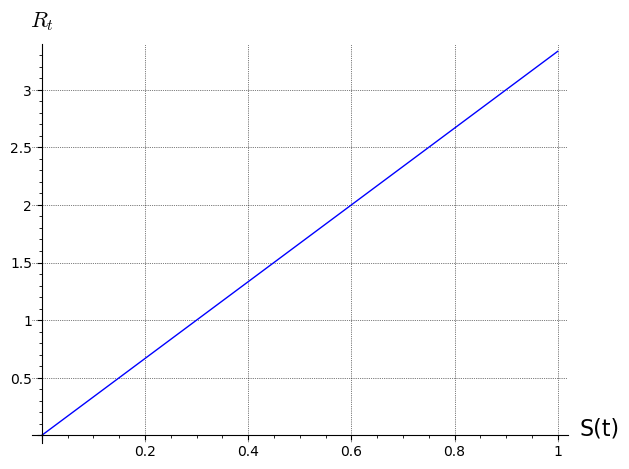

In [23]:
P = plot(Rt(a=.02, c=.3, e=.04, f=.05),(S,0,1))
P.show(axes_labels=['S(t)','$R_t$'], gridlines=True)

In [30]:
###Análise da estabilidade

In [24]:
q = det(jack)
p = jack[0, 0] + jack[1, 1] + jack[2, 2] + jack[3, 3]
delta = p**2 -4*q
delta

-4*I*b*c*d*e - 4*I*b*c*d*f + (I*c + a + b + d + e + f)^2

In [29]:
delta.simplify_full()

I^2*c^2 + a^2 + 2*a*b + b^2 + 2*(I*a + I*b)*c + 2*(I*c + a + b)*d + d^2 + 2*(I*c - (2*I*b*c - 1)*d + a + b)*e + e^2 + 2*(I*c - (2*I*b*c - 1)*d + a + b + e)*f + f^2

In [25]:
p

-I*c - a - b - d - e - f

In [26]:
q

I*b*c*d*e + I*b*c*d*f